# Unsupervised Learning
## Class Project CS525

problems to solve:

  1. Determine which clustering algo is good for our dataset
  2. Determine how many clusters or other parameters in order to get a best result within one algo.
  3. Is dimension reduction helpful? And if so, how many components to use.
  4. Scale data?
  5. Which distance meansure we should use? Or under each algo use different distance?

In [1]:
# load data
import pickle
import numpy as np

DATA_PATH = "data"

def load():
    with open(DATA_PATH,'rb') as f:
        return pickle.load(f)

def dump(obj, path):
    with open(path, 'wb') as f:
        pickle.dump(obj, f, protocal=pickle.HIGHEST_PROTOCOL)

data, names = load()
N, P = data.shape
labels_true = [0]*20+[1]*8+[2]*10
data.shape

(38, 999)

## Explore Data

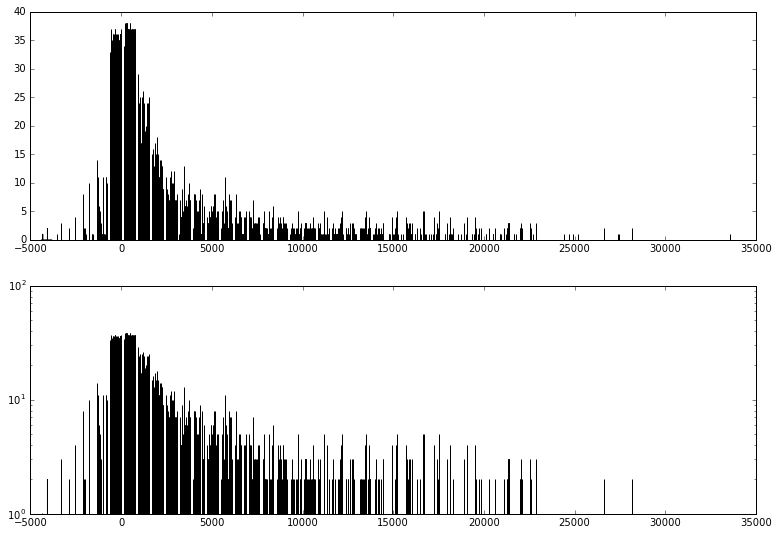

In [133]:
from matplotlib import pyplot as plt
plt.figure(figsize=(13,5))
plt.hist(data,bins=50)
plt.show()

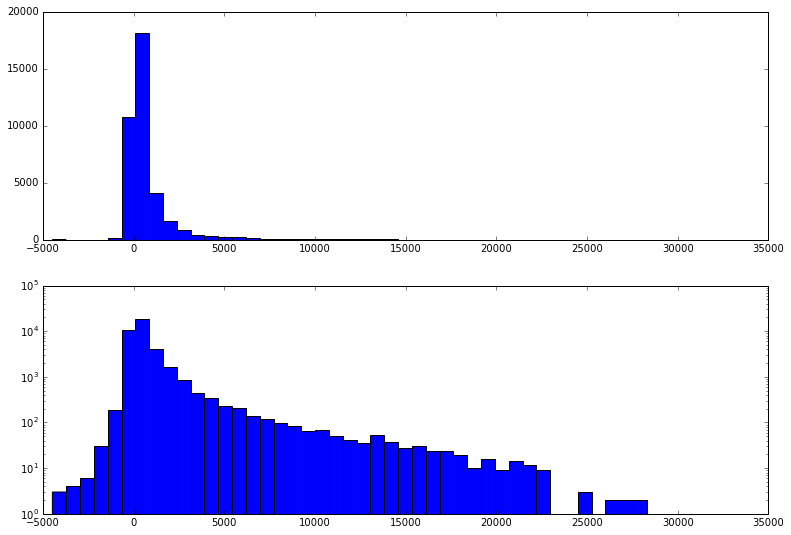

In [132]:
plt.figure(figsize=(13,9))
plt.subplot(211)
plt.hist(data.flatten(),bins=50)
plt.subplot(212)
plt.hist(data.flatten(),log=True,bins=50)
plt.show()

## 3D Plot

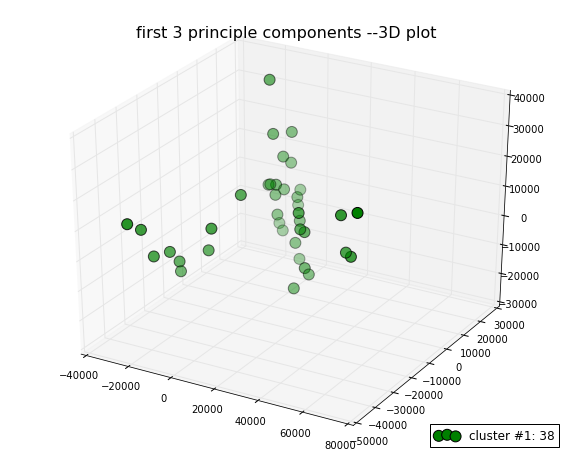

In [2]:
%matplotlib inline
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot3d(labels = np.zeros(38,int),size=10):
    # get 3PC from PCA
    dimen = 3
    data_t = PCA(n_components=dimen).fit_transform(data)
    # mark and color
    colors = "grcmyb"*11
    markers = 'oh,^v*+xd|_'*6
    # plot each cluster
    fig = plt.figure(figsize=(size,size*0.8))
    ax = fig.add_subplot(111, projection='3d')
    legends=[]
    leg_desc=[]
    for lab in [-1]+range(max(labels)+1):
        if lab==-1:
            if not -1 in labels: continue
            legends.append(ax.scatter(*[data_t[np.argwhere(labels==lab),i] for i in xrange(dimen)],c='k',
                   marker='.',s=30))
            leg_desc.append('noises      : %d' % sum(labels==lab))
        else:
            legends.append(ax.scatter(*[data_t[np.argwhere(labels==lab),i] for i in xrange(dimen)],c=colors[lab],
                   marker=markers[lab],s=120))
            leg_desc.append("cluster #%d: %d" % (lab+1, sum(labels==lab)))
    plt.legend(legends,leg_desc,fontsize=size*1.2,loc=4)
    plt.title("first 3 principle components --3D plot",size=size*1.6)
    plt.show()
        
plot3d()

## High dimension -- PCA

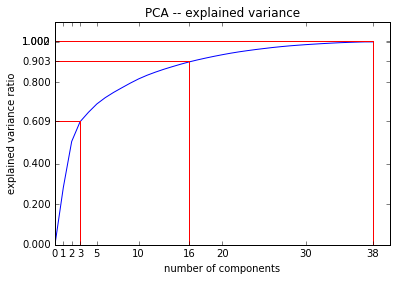

In [3]:
from sklearn.decomposition import PCA
# PCA on data 
pca=PCA()
pca.fit(data)
d = [0]+list(pca.explained_variance_ratio_)
plt.plot([sum(d[:i+1]) for i in xrange(len(d))])
plt_xt = [0,1,2,5,10,20,30]
plt_yt = [0.0,.2,.4,.8,1]

for i in [3,16,38]:
    #slight adjust(.0025) to make plot better
    pct = sum(d[:i+1])+.0025
    plt.plot([0, i], [pct, pct], 'r-')
    plt.plot([i, i], [0, pct], 'r-')
    plt_xt.append(i)
    plt_yt.append(pct)
del i, pct

plt.xticks(plt_xt)
plt.yticks(plt_yt)
plt.ylim([0,1.1])
plt.xlabel("number of components")
plt.ylabel("explained variance ratio")
plt.title("PCA -- explained variance")
plt.show()

In [4]:
# get all transformed components 
pcdata = {}
for i in xrange(N):
    pcdata[i+1]=PCA(n_components=i+1).fit_transform(data)

## Assessing measurement

In [5]:
import pprint
from sklearn import metrics  
from collections import defaultdict

def scores(data,labels):
    print('Estimated number of clusters: %d' % (max(labels)+1))
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
    print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
    print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
    if max(labels)>0:
        print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(data, labels, metric='sqeuclidean'))
        
def check_names(labels,names=names):
    clusters = defaultdict(list)
    for i in xrange(len(labels)):
        clusters[labels[i]].append(names[i])
    return clusters

def show(data,labels):
    plot3d(labels)
    scores(data,labels)
    print '-'*20
    pprint.pprint(dict(check_names(labels)))

## BSAS

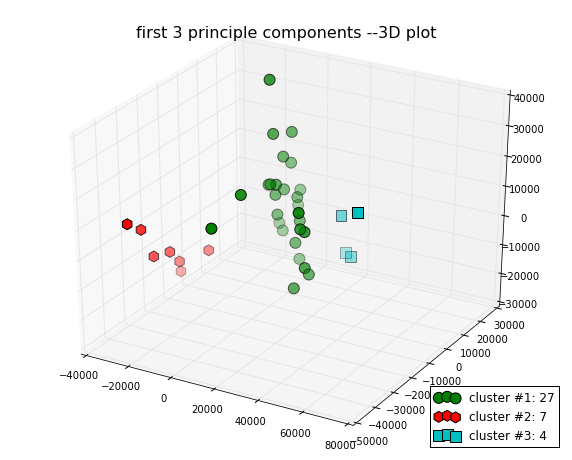

Estimated number of clusters: 3
Homogeneity: 0.526
Completeness: 0.676
V-measure: 0.592
Adjusted Rand Index: 0.506
Adjusted Mutual Information: 0.494
Silhouette Coefficient: 0.441
--------------------
{0: ['ALL_19769_B.cell',
     'ALL_19769_B.cell_2',
     'ALL_28373_B.cell',
     'ALL_28373_B.cell_2',
     'ALL_9692_B.cell',
     'ALL_9692_B.cell_2',
     'ALL_17281_B.cell',
     'ALL_17281_B.cell_2',
     'ALL_20414_B.cell',
     'ALL_20414_B.cell_2',
     'ALL_549_B.cell',
     'ALL_549_B.cell_2',
     'ALL_20185_B.cell',
     'ALL_20185_B.cell_2',
     'ALL_18239_B.cell',
     'ALL_18239_B.cell_2',
     'ALL_7092_B.cell',
     'ALL_7092_B.cell_2',
     'ALL_R23_B.cell',
     'ALL_R23_B.cell_2',
     'ALL_22474_T.cell_2',
     'AML_13',
     'AML_16_2',
     'AML_1',
     'AML_1_2',
     'AML_3_2',
     'AML_6'],
 1: ['ALL_19881_T.cell',
     'ALL_19881_T.cell_2',
     'ALL_9723_T.cell',
     'ALL_9723_T.cell_2',
     'ALL_14402_T.cell',
     'ALL_14402_T.cell_2',
     'ALL_22474_T

In [6]:
import numpy as np

class Cluster:
    def __init__(self, init_point=None, init_code=None):
        self.points = []
        self.codes = []
        self.points.append(init_point)
        self.codes.append(init_code)
        self.center = init_point
        
    def __str__(self):
        return "Cluster_class | # of points: %d" % len(self.points) +\
        " Member:" + str(self.codes)
    
    def addP(self, point, code):
        self.points.append(point)
        self.codes.append(code)
        self._new_center()
        
    def _new_center(self):
        self.center = np.mean(self.points,0)

def calc_dist(a,b):
    return ((np.array(a)-np.array(b))**2).sum()

def BSAS(data,theta,q):
    clusters = [Cluster(data[0],0)]
    for idx in range(1,len(data)):
        point = data[idx]
        # find nearest cluster
        tmpc = clusters[0]
        min_dist = calc_dist(point, tmpc.center)
        for c in clusters:
            ndist = calc_dist(point, c.center)
            if ndist<min_dist:
                min_dist = ndist
                tmpc = c
        if min_dist>theta and len(clusters)<q:
            clusters.append(Cluster(point, idx))
        else:
            tmpc.addP(point, idx)
    labels=range(len(data))
    for c in xrange(len(clusters)):
        for code in clusters[c].codes:
            labels[code]=c
    labels = np.array(labels,int)
    assert (labels>=0).prod()
    return labels

ci_BSAS = BSAS(data,1e9+2e9,8)
show(data,ci_BSAS)

## MBSAS

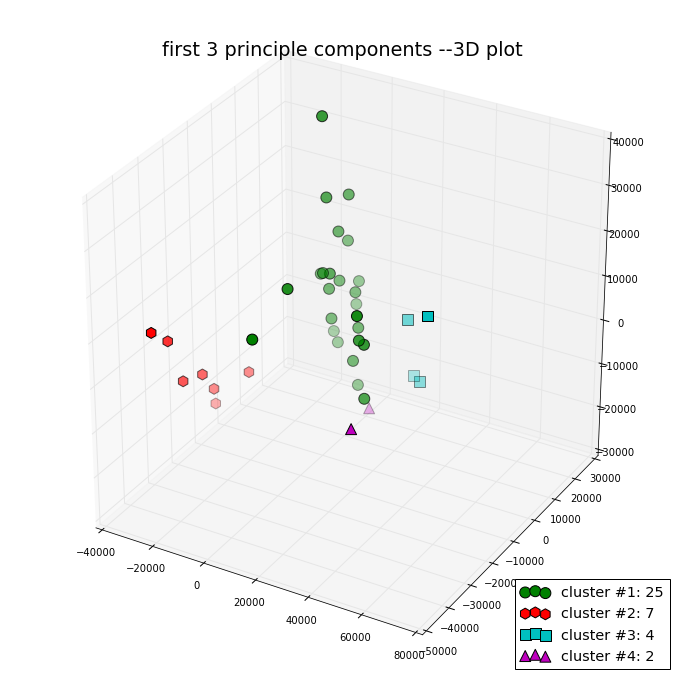

Estimated number of clusters: 4
Homogeneity: 0.612
Completeness: 0.635
V-measure: 0.623
Adjusted Rand Index: 0.586
Adjusted Mutual Information: 0.571
Silhouette Coefficient: 0.339
--------------------
{0: ['ALL_19769_B.cell',
     'ALL_19769_B.cell_2',
     'ALL_28373_B.cell',
     'ALL_28373_B.cell_2',
     'ALL_9692_B.cell',
     'ALL_9692_B.cell_2',
     'ALL_17281_B.cell',
     'ALL_17281_B.cell_2',
     'ALL_20414_B.cell',
     'ALL_20414_B.cell_2',
     'ALL_549_B.cell',
     'ALL_549_B.cell_2',
     'ALL_20185_B.cell',
     'ALL_20185_B.cell_2',
     'ALL_18239_B.cell',
     'ALL_18239_B.cell_2',
     'ALL_7092_B.cell',
     'ALL_7092_B.cell_2',
     'ALL_R23_B.cell',
     'ALL_R23_B.cell_2',
     'ALL_22474_T.cell_2',
     'AML_13',
     'AML_1',
     'AML_3_2',
     'AML_6'],
 1: ['ALL_19881_T.cell',
     'ALL_19881_T.cell_2',
     'ALL_9723_T.cell',
     'ALL_9723_T.cell_2',
     'ALL_14402_T.cell',
     'ALL_14402_T.cell_2',
     'ALL_22474_T.cell'],
 2: ['AML_13_2', 'AML_16

In [7]:
def MBSAS(data,theta,q):
    clusters = [Cluster(data[0],0)]
    for phase in xrange(2):
        for idx in range(1,len(data)):
            point = data[idx]
            # find nearest cluster
            tmpc = clusters[0]
            min_dist = calc_dist(point, tmpc.center)
            for c in clusters:
                ndist = calc_dist(point, c.center)
                if ndist<min_dist:
                    min_dist = ndist
                    tmpc = c
            if min_dist>theta and len(clusters)<q and phase==0:
                clusters.append(Cluster(point, idx))
            elif phase==1:
                tmpc.addP(point, idx)
    labels=-np.ones(len(data))
    for c in xrange(len(clusters)):
        for code in clusters[c].codes:
            labels[code]=c
    labels = np.array(labels,int)
    assert (labels>=0).prod()
    return labels

ci_MBSAS = MBSAS(data,1.5e9+2e9,8)
show(data,ci_MBSAS)

## TTSAS Algorithm

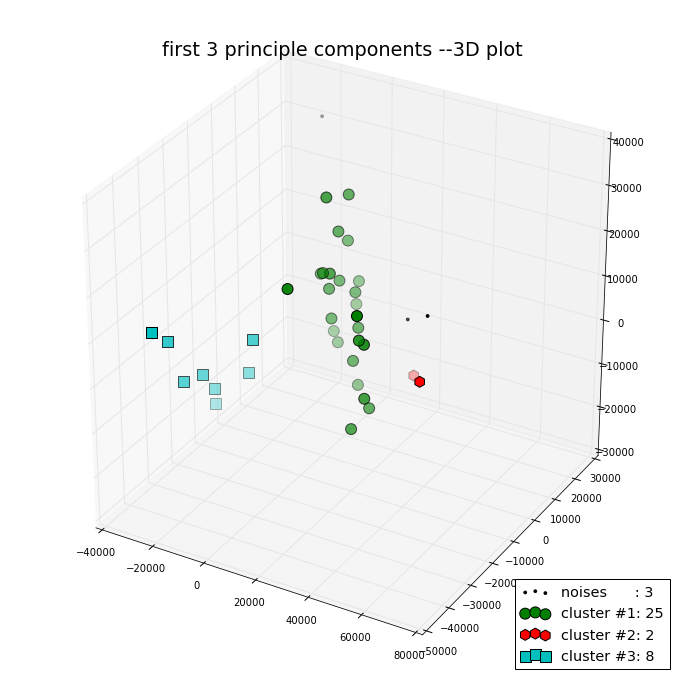

Estimated number of clusters: 3
Homogeneity: 0.415
Completeness: 0.440
V-measure: 0.427
Adjusted Rand Index: 0.385
Adjusted Mutual Information: 0.354
Silhouette Coefficient: 0.373
--------------------
{-1: ['ALL_20185_B.cell', 'AML_13_2', 'AML_3'],
 0: ['ALL_19769_B.cell',
     'ALL_19769_B.cell_2',
     'ALL_28373_B.cell',
     'ALL_28373_B.cell_2',
     'ALL_9692_B.cell',
     'ALL_9692_B.cell_2',
     'ALL_17281_B.cell',
     'ALL_17281_B.cell_2',
     'ALL_20414_B.cell',
     'ALL_20414_B.cell_2',
     'ALL_549_B.cell',
     'ALL_549_B.cell_2',
     'ALL_20185_B.cell_2',
     'ALL_18239_B.cell',
     'ALL_18239_B.cell_2',
     'ALL_7092_B.cell',
     'ALL_7092_B.cell_2',
     'ALL_R23_B.cell',
     'ALL_22474_T.cell_2',
     'AML_13',
     'AML_16_2',
     'AML_1',
     'AML_1_2',
     'AML_3_2',
     'AML_6'],
 1: ['AML_16', 'AML_6_2'],
 2: ['ALL_R23_B.cell_2',
     'ALL_19881_T.cell',
     'ALL_19881_T.cell_2',
     'ALL_9723_T.cell',
     'ALL_9723_T.cell_2',
     'ALL_14402_T.c

In [8]:
from random import choice

def TTSAS(data,lower,upper):
    clusters = [Cluster(data[0],0)]
    unassigned = range(1,len(data))
    runtimes = 0
    while unassigned and runtimes<1000:
        runtimes += 1
        idx = choice(unassigned)
        tmp = clusters[0]
        min_dist = calc_dist(data[idx],tmp.center)
        for c in clusters[1:]:
            ndist = calc_dist(data[idx],c.center)
            if ndist<min_dist:
                tmp = c
                min_dist = ndist
        if min_dist>upper:
            clusters.append(Cluster(data[idx],idx))
        elif min_dist<lower:
            tmp.addP(data[idx],idx)
    labels=-np.ones(len(data))
    for c in xrange(len(clusters)):
        for code in clusters[c].codes:
            labels[code]=c
    labels = np.array(labels,int)
    # assert (labels>=0).prod()
    return labels

ci_TTSAS = TTSAS(data,2e9,3e9)
show(data,ci_TTSAS)             

## KMeans

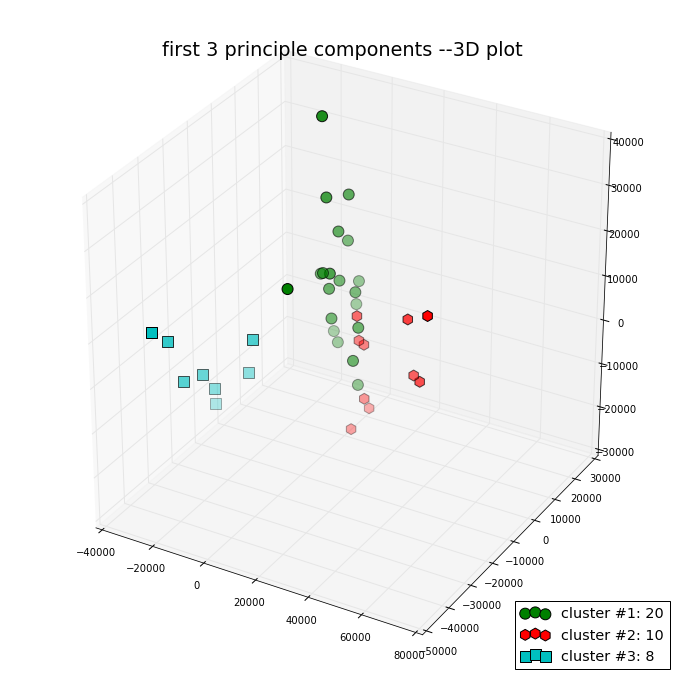

Estimated number of clusters: 3
Homogeneity: 0.735
Completeness: 0.735
V-measure: 0.735
Adjusted Rand Index: 0.787
Adjusted Mutual Information: 0.718
Silhouette Coefficient: 0.439
--------------------
{0: ['ALL_19769_B.cell',
     'ALL_19769_B.cell_2',
     'ALL_28373_B.cell',
     'ALL_28373_B.cell_2',
     'ALL_9692_B.cell',
     'ALL_9692_B.cell_2',
     'ALL_17281_B.cell',
     'ALL_17281_B.cell_2',
     'ALL_20414_B.cell',
     'ALL_20414_B.cell_2',
     'ALL_549_B.cell',
     'ALL_549_B.cell_2',
     'ALL_20185_B.cell',
     'ALL_20185_B.cell_2',
     'ALL_18239_B.cell',
     'ALL_18239_B.cell_2',
     'ALL_7092_B.cell',
     'ALL_7092_B.cell_2',
     'ALL_R23_B.cell',
     'AML_13'],
 1: ['ALL_22474_T.cell_2',
     'AML_13_2',
     'AML_16',
     'AML_16_2',
     'AML_1',
     'AML_1_2',
     'AML_3',
     'AML_3_2',
     'AML_6',
     'AML_6_2'],
 2: ['ALL_R23_B.cell_2',
     'ALL_19881_T.cell',
     'ALL_19881_T.cell_2',
     'ALL_9723_T.cell',
     'ALL_9723_T.cell_2',
     '

In [9]:
from sklearn.cluster import KMeans 

N_CLUSTER = 3
inputdata = data

model = KMeans(n_clusters=N_CLUSTER)
model.fit(inputdata)
ci_kmeans = model.labels_
show(data,ci_kmeans)

## DBSCAN

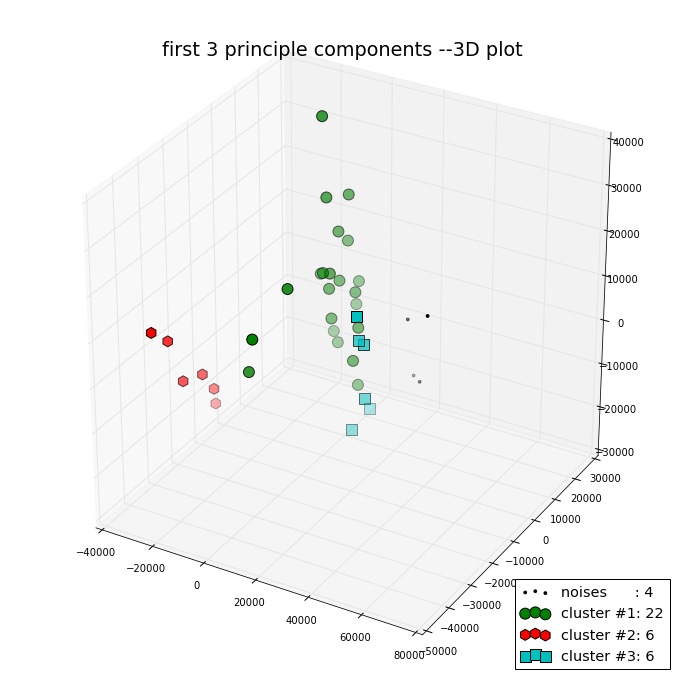

Estimated number of clusters: 3
Homogeneity: 0.721
Completeness: 0.645
V-measure: 0.681
Adjusted Rand Index: 0.734
Adjusted Mutual Information: 0.612
Silhouette Coefficient: 0.172
--------------------
{-1: ['AML_13_2', 'AML_16', 'AML_3', 'AML_6_2'],
 0: ['ALL_19769_B.cell',
     'ALL_19769_B.cell_2',
     'ALL_28373_B.cell',
     'ALL_28373_B.cell_2',
     'ALL_9692_B.cell',
     'ALL_9692_B.cell_2',
     'ALL_17281_B.cell',
     'ALL_17281_B.cell_2',
     'ALL_20414_B.cell',
     'ALL_20414_B.cell_2',
     'ALL_549_B.cell',
     'ALL_549_B.cell_2',
     'ALL_20185_B.cell',
     'ALL_20185_B.cell_2',
     'ALL_18239_B.cell',
     'ALL_18239_B.cell_2',
     'ALL_7092_B.cell',
     'ALL_7092_B.cell_2',
     'ALL_R23_B.cell',
     'ALL_R23_B.cell_2',
     'ALL_14402_T.cell_2',
     'AML_13'],
 1: ['ALL_19881_T.cell',
     'ALL_19881_T.cell_2',
     'ALL_9723_T.cell',
     'ALL_9723_T.cell_2',
     'ALL_14402_T.cell',
     'ALL_22474_T.cell'],
 2: ['ALL_22474_T.cell_2', 'AML_16_2', 'AML_1'

In [93]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale

#EPS = 1e-4


model = DBSCAN(eps=.3, min_samples=4)
model.fit(scale(pcdata[1]))
ci_dbsc = model.labels_
show(inputdata,ci_dbsc)

## Agglomerative

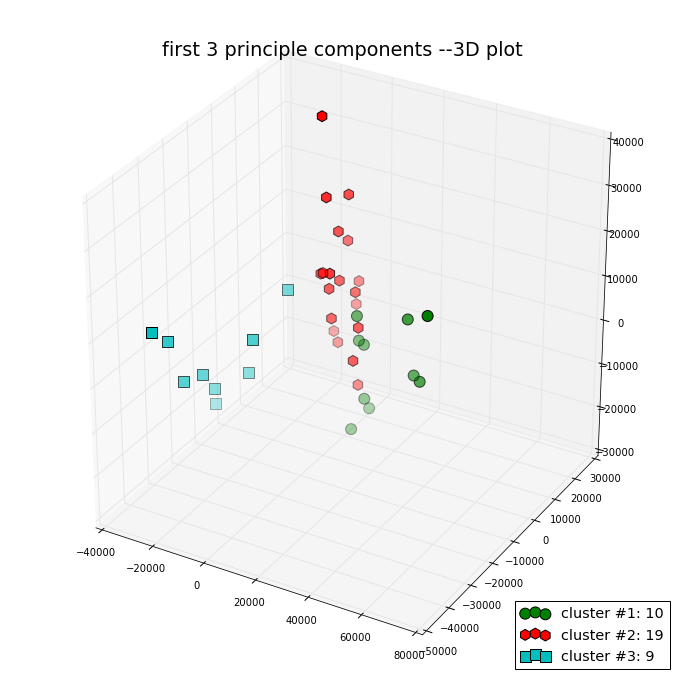

Estimated number of clusters: 3
Homogeneity: 0.691
Completeness: 0.677
V-measure: 0.684
Adjusted Rand Index: 0.715
Adjusted Mutual Information: 0.657
Silhouette Coefficient: 0.432
--------------------
{0: ['ALL_22474_T.cell_2',
     'AML_13_2',
     'AML_16',
     'AML_16_2',
     'AML_1',
     'AML_1_2',
     'AML_3',
     'AML_3_2',
     'AML_6',
     'AML_6_2'],
 1: ['ALL_19769_B.cell',
     'ALL_19769_B.cell_2',
     'ALL_28373_B.cell',
     'ALL_28373_B.cell_2',
     'ALL_9692_B.cell',
     'ALL_9692_B.cell_2',
     'ALL_17281_B.cell',
     'ALL_17281_B.cell_2',
     'ALL_20414_B.cell',
     'ALL_549_B.cell',
     'ALL_549_B.cell_2',
     'ALL_20185_B.cell',
     'ALL_20185_B.cell_2',
     'ALL_18239_B.cell',
     'ALL_18239_B.cell_2',
     'ALL_7092_B.cell',
     'ALL_7092_B.cell_2',
     'ALL_R23_B.cell',
     'AML_13'],
 2: ['ALL_20414_B.cell_2',
     'ALL_R23_B.cell_2',
     'ALL_19881_T.cell',
     'ALL_19881_T.cell_2',
     'ALL_9723_T.cell',
     'ALL_9723_T.cell_2',
     '

In [14]:
from sklearn.cluster import AgglomerativeClustering as Aggl

N_CLUSTER = 3

model = Aggl(n_clusters=N_CLUSTER)
model.fit(data)
ci_AGGL = model.labels_
show(data,ci_AGGL)

## Birch

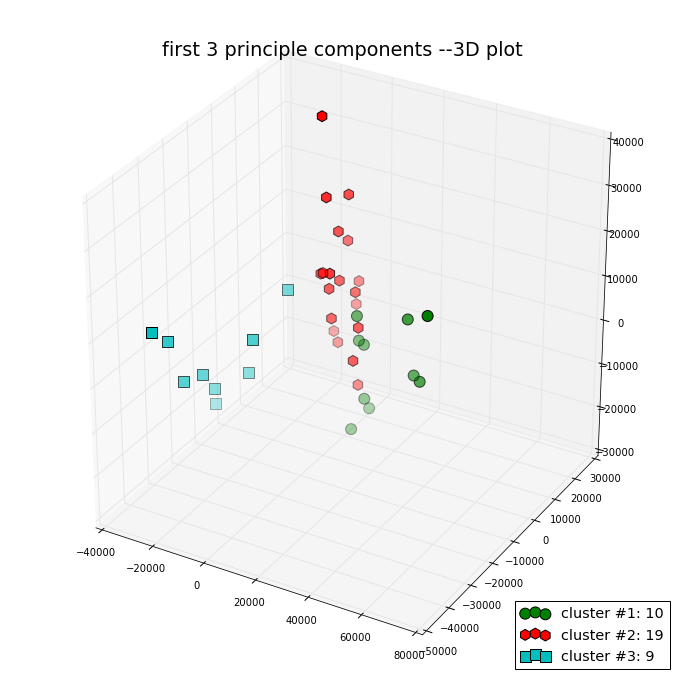

Estimated number of clusters: 3
Homogeneity: 0.691
Completeness: 0.677
V-measure: 0.684
Adjusted Rand Index: 0.715
Adjusted Mutual Information: 0.657
Silhouette Coefficient: 0.432
--------------------
{0: ['ALL_22474_T.cell_2',
     'AML_13_2',
     'AML_16',
     'AML_16_2',
     'AML_1',
     'AML_1_2',
     'AML_3',
     'AML_3_2',
     'AML_6',
     'AML_6_2'],
 1: ['ALL_19769_B.cell',
     'ALL_19769_B.cell_2',
     'ALL_28373_B.cell',
     'ALL_28373_B.cell_2',
     'ALL_9692_B.cell',
     'ALL_9692_B.cell_2',
     'ALL_17281_B.cell',
     'ALL_17281_B.cell_2',
     'ALL_20414_B.cell',
     'ALL_549_B.cell',
     'ALL_549_B.cell_2',
     'ALL_20185_B.cell',
     'ALL_20185_B.cell_2',
     'ALL_18239_B.cell',
     'ALL_18239_B.cell_2',
     'ALL_7092_B.cell',
     'ALL_7092_B.cell_2',
     'ALL_R23_B.cell',
     'AML_13'],
 2: ['ALL_20414_B.cell_2',
     'ALL_R23_B.cell_2',
     'ALL_19881_T.cell',
     'ALL_19881_T.cell_2',
     'ALL_9723_T.cell',
     'ALL_9723_T.cell_2',
     '

In [12]:
from sklearn.cluster import Birch 

#parameters

model = Birch()
model.fit(data)
ci_BRCH = model.labels_
show(data,ci_BRCH)

## Affinity Propagation

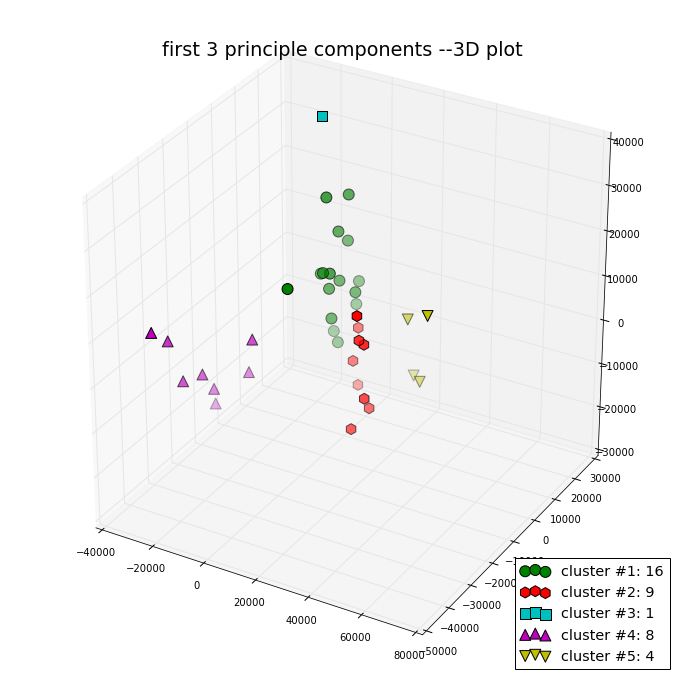

Estimated number of clusters: 5
Homogeneity: 0.724
Completeness: 0.539
V-measure: 0.618
Adjusted Rand Index: 0.591
Adjusted Mutual Information: 0.494
Silhouette Coefficient: 0.356
--------------------
{0: ['ALL_19769_B.cell',
     'ALL_19769_B.cell_2',
     'ALL_28373_B.cell',
     'ALL_28373_B.cell_2',
     'ALL_9692_B.cell',
     'ALL_17281_B.cell',
     'ALL_17281_B.cell_2',
     'ALL_20414_B.cell',
     'ALL_20414_B.cell_2',
     'ALL_549_B.cell',
     'ALL_549_B.cell_2',
     'ALL_20185_B.cell_2',
     'ALL_18239_B.cell',
     'ALL_18239_B.cell_2',
     'ALL_7092_B.cell_2',
     'ALL_R23_B.cell'],
 1: ['ALL_9692_B.cell_2',
     'ALL_7092_B.cell',
     'ALL_22474_T.cell_2',
     'AML_13',
     'AML_16_2',
     'AML_1',
     'AML_1_2',
     'AML_3_2',
     'AML_6'],
 2: ['ALL_20185_B.cell'],
 3: ['ALL_R23_B.cell_2',
     'ALL_19881_T.cell',
     'ALL_19881_T.cell_2',
     'ALL_9723_T.cell',
     'ALL_9723_T.cell_2',
     'ALL_14402_T.cell',
     'ALL_14402_T.cell_2',
     'ALL_22474

In [103]:
from sklearn.cluster import AffinityPropagation as AFFP 

#parameters

model = AFFP(damping=0.7,convergence_iter=350,max_iter=3500)
model.fit(data)
ci_AFFP = model.labels_
show(data,ci_AFFP)

## RBM(test)

In [65]:
import rbm as RBM
model = RBM.RBM(4,4,0.1)
model.train(np.array([
        [0,0,0,1],
        [0,0,1,0],
        [0,1,0,0],
        [1,0,0,0],
    ]),1000)

Epoch 0: error is 4.18286995123
Epoch 1: error is 4.07837959162
Epoch 2: error is 3.92835938193
Epoch 3: error is 3.94865980882
Epoch 4: error is 3.83810586791
Epoch 5: error is 3.65840103219
Epoch 6: error is 3.769261085
Epoch 7: error is 3.56009724364
Epoch 8: error is 3.67948615013
Epoch 9: error is 3.73479938753
Epoch 10: error is 3.50458402097
Epoch 11: error is 3.63654351699
Epoch 12: error is 3.70493920713
Epoch 13: error is 3.3312480901
Epoch 14: error is 3.38520381584
Epoch 15: error is 3.45400703339
Epoch 16: error is 3.53843478461
Epoch 17: error is 3.46881067381
Epoch 18: error is 3.52698300919
Epoch 19: error is 3.68717260238
Epoch 20: error is 3.44020722417
Epoch 21: error is 3.26943703568
Epoch 22: error is 3.3018626082
Epoch 23: error is 3.13541540183
Epoch 24: error is 3.24841427408
Epoch 25: error is 3.64001953576
Epoch 26: error is 3.41110983635
Epoch 27: error is 3.54107363487
Epoch 28: error is 3.15613275796
Epoch 29: error is 3.10612607626
Epoch 30: error is 3.294

In [66]:
np.dot(np.array([
        [1,0,0,0,1],
        [1,0,0,1,0],
        [1,0,1,0,0],
        [1,1,0,0,0],
    ]),model.weights)

array([[ 0.64358005,  2.9732367 , -2.15682892, -2.82436818,  2.66173136],
       [-0.41134023, -3.29988739,  2.33833598,  0.49999615,  2.91775086],
       [-2.98277453,  2.87669818,  1.82079954,  1.95581205, -3.28579411],
       [ 3.46324187, -0.94624869, -1.97805166,  2.77028481, -2.29886342]])

In [9]:
for i in range(len(names)):
    print i,names[i]

0 ALL_19769_B.cell
1 ALL_19769_B.cell_2
2 ALL_28373_B.cell
3 ALL_28373_B.cell_2
4 ALL_9692_B.cell
5 ALL_9692_B.cell_2
6 ALL_17281_B.cell
7 ALL_17281_B.cell_2
8 ALL_20414_B.cell
9 ALL_20414_B.cell_2
10 ALL_549_B.cell
11 ALL_549_B.cell_2
12 ALL_20185_B.cell
13 ALL_20185_B.cell_2
14 ALL_18239_B.cell
15 ALL_18239_B.cell_2
16 ALL_7092_B.cell
17 ALL_7092_B.cell_2
18 ALL_R23_B.cell
19 ALL_R23_B.cell_2
20 ALL_19881_T.cell
21 ALL_19881_T.cell_2
22 ALL_9723_T.cell
23 ALL_9723_T.cell_2
24 ALL_14402_T.cell
25 ALL_14402_T.cell_2
26 ALL_22474_T.cell
27 ALL_22474_T.cell_2
28 AML_13
29 AML_13_2
30 AML_16
31 AML_16_2
32 AML_1
33 AML_1_2
34 AML_3
35 AML_3_2
36 AML_6
37 AML_6_2
